### 乱

In [24]:
from data_person import FileIter
import sys, os
import argparse
import mxnet as mx
import numpy as np
import logging
import symbol_fcnxs
import init_fcnxs
from data_person import FileIter
from solver import Solver
ctx = mx.gpu(3)
data_root_dir = './coco_person_datasets'
%matplotlib inline

In [20]:
import cv2
from skimage import io
import matplotlib.pyplot as plt
img = cv2.imread('./pascal_voc_person_datasets/images/2011_003255.jpg')

In [21]:
img2 = io.imread('./pascal_voc_person_datasets/images/2011_003255.jpg')

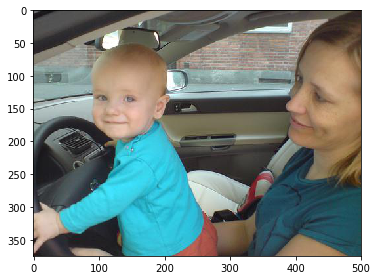

In [25]:
io.imshow(img2)

In [8]:
img.shape

(375, 500, 3)

In [41]:
imgg = cv2.resize(img,(375,500))

In [37]:
img.astype(np.uint8).transpose(2,0,1)

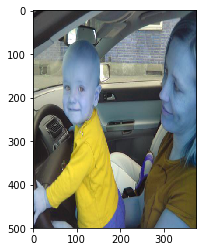

In [42]:
plt.imshow(imgg.astype(np.uint8))

### 测试 FileIter

#### 测试 ImageRecordIter

In [37]:
%matplotlib inline
from PIL import Image
from skimage import io,transform
import numpy as np
import pandas as pd
import cv2
import mxnet as mx
size = (128,128)
rgb_mean = (123.68, 116.779, 103.939)
dataiter = mx.io.ImageRecordIter(
    #rec文件的路径
    path_imgrec="./coco_person_datasets/coco_train_%d,%d.rec"%(size[0],size[1]),
    #iterator生成的每一个实例的shape
    data_shape=(3, size[0], size[1]),
    mean_r=rgb_mean[0],
    mean_g=rgb_mean[1],
    mean_b=rgb_mean[2],
    data_name='data',
    label_name='softmax_label',
    #batch的大小
    batch_size=2,
    #是否随机从原图中切取出一个data_shape大小
    rand_crop=False,
    #是否随机水平反射
    rand_mirror=False,
    label_width=size[0]*size[1]
)

#### 合并多个数据集

In [30]:
datalst_list = {
    'portrait': 
        ['/home/wangjundong/data/segmentation_data/portrait_person_datasets/portrait_train.lst',
         '/home/wangjundong/data/segmentation_data/portrait_person_datasets/images'
        ],
    'coco': 
    ['/home/wangjundong/data/segmentation_data/coco_person_datasets/coco_train.lst',
     '/home/wangjundong/data/segmentation_data/coco_person_datasets/images'
    ]
}

In [39]:
from os import path
data_record = []
index = 0
for dataname, datalst in datalst_list.items():
    print dataname
    with open(datalst[0],'r') as fin:
        for line in fin:
            line = line.strip()
            if len(line) == 0:
                continue
            item = line.split('\t')
            data_record.append(
                (
                    path.join(datalst[1],path.split(item[1])[-1]),
                    path.join(datalst[1],path.split(item[2])[-1]),
                )
            )
#             print data_record[-1]
#             break
print len(data_record)

coco
portrait
46546


In [40]:
45174+1372

46546

In [5]:
for idx, data in enumerate(train_dataiter):
    data
print idx

2846


In [54]:
dataiter.provide_label[0][0]

'softmax_label'

In [33]:
for data in dataiter:
#     print data.data
    print data.label ,data.index,data.provide_data
    break

[
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
<NDArray 2x16384 @cpu_pinned(0)>] [0 0] None


0
(128, 128)


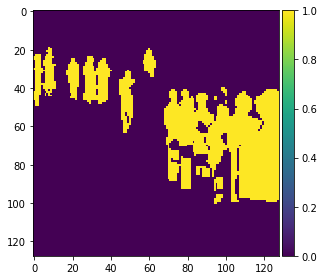

In [30]:
label = data.label[0][1].asnumpy().astype(np.uint8)
label = label.reshape(size[0],size[1])
print sum(label.flatten()[(label.flatten() != 1) * (label.flatten() != 0)])
print label.shape
io.imshow(label)

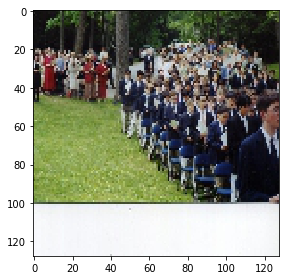

In [31]:
img = data.data[0][1].asnumpy().astype(np.uint8)
io.imshow(img.transpose(1,2,0))

### 网络结构

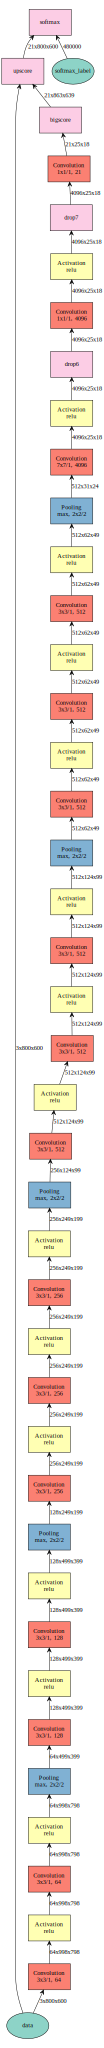

In [8]:
mx.viz.plot_network(fcnxs,shape={'data':(1,3,800,600)})

#### 构建 FCN-32/16/8模型

##### FCN-32s

In [1]:
from symbol_fcnxs_person import get_fcn32s_symbol, offset
import mxnet as mx

In [2]:
fcn32s = get_fcn32s_symbol(
            numclass=2
        )

In [7]:
fcn32s.list_arguments()

['data',
 'conv1_1_weight',
 'conv1_1_bias',
 'conv1_2_weight',
 'conv1_2_bias',
 'conv2_1_weight',
 'conv2_1_bias',
 'conv2_2_weight',
 'conv2_2_bias',
 'conv3_1_weight',
 'conv3_1_bias',
 'conv3_2_weight',
 'conv3_2_bias',
 'conv3_3_weight',
 'conv3_3_bias',
 'conv4_1_weight',
 'conv4_1_bias',
 'conv4_2_weight',
 'conv4_2_bias',
 'conv4_3_weight',
 'conv4_3_bias',
 'conv5_1_weight',
 'conv5_1_bias',
 'conv5_2_weight',
 'conv5_2_bias',
 'conv5_3_weight',
 'conv5_3_bias',
 'fc6_weight',
 'fc6_bias',
 'fc7_weight',
 'fc7_bias',
 'score_weight',
 'score_bias',
 'bigscore_weight',
 'softmax_label']

In [5]:
fcnxs, fcnxs_args, fcnxs_auxs = mx.model.load_checkpoint(
    'model_coco_person/FCN32s_VGG16_size256_batch8_lr1e-06',
    50
    )

##### FCN-16s

In [1]:
from symbol_fcnxs_person import get_fcn16s_symbol, offset
import mxnet as mx

In [2]:
fcn16s = get_fcn16s_symbol(
            numclass=2
        )

(5, 5)


In [69]:
fcn16s.list_arguments()

['data',
 'conv1_1_weight',
 'conv1_1_bias',
 'conv1_2_weight',
 'conv1_2_bias',
 'conv2_1_weight',
 'conv2_1_bias',
 'conv2_2_weight',
 'conv2_2_bias',
 'conv3_1_weight',
 'conv3_1_bias',
 'conv3_2_weight',
 'conv3_2_bias',
 'conv3_3_weight',
 'conv3_3_bias',
 'conv4_1_weight',
 'conv4_1_bias',
 'conv4_2_weight',
 'conv4_2_bias',
 'conv4_3_weight',
 'conv4_3_bias',
 'conv5_1_weight',
 'conv5_1_bias',
 'conv5_2_weight',
 'conv5_2_bias',
 'conv5_3_weight',
 'conv5_3_bias',
 'fc6_weight',
 'fc6_bias',
 'fc7_weight',
 'fc7_bias',
 'score_weight',
 'score_bias',
 'score2_weight',
 'score_pool4_weight',
 'score_pool4_bias',
 'bigscore_weight',
 'softmax_label']

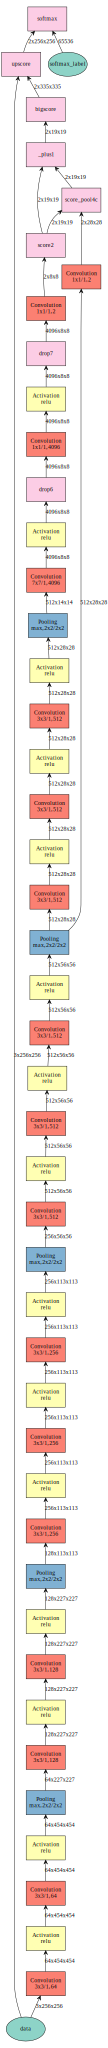

In [71]:
mx.viz.plot_network(fcn16s,shape={'data':(1,3,256,256)})

##### FCN-8s

##### FCN-4s

In [1]:
from symbol_fcnxs_person import get_fcn4s_symbol
import mxnet as mx

In [2]:
fcn4s = get_fcn4s_symbol(
            numclass=2
        )

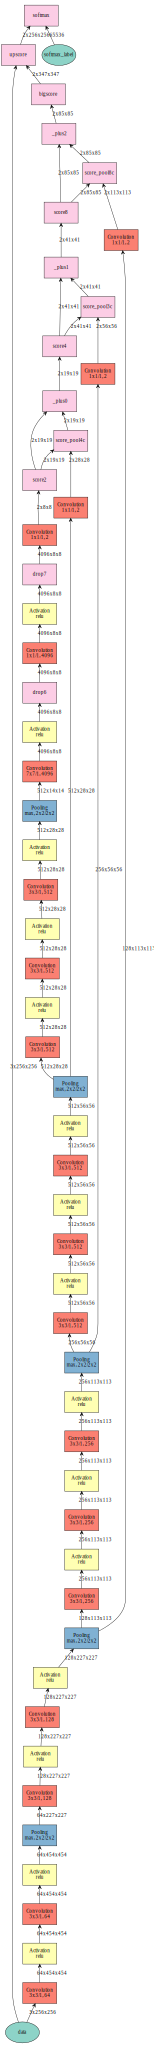

In [3]:
mx.viz.plot_network(fcn4s,shape={'data':(1,3,256,256)})

In [5]:
arg_shapes, out_shapes, aux_shapes = fcnxs.infer_shape(data = (1,3,256,256))

In [316]:
out_shapes,aux_shapes

([(1L, 1L, 500L, 500L)], [])

In [6]:
arg_shapes

[(1L, 3L, 256L, 256L),
 (64L, 3L, 3L, 3L),
 (64L,),
 (64L, 64L, 3L, 3L),
 (64L,),
 (128L, 64L, 3L, 3L),
 (128L,),
 (128L, 128L, 3L, 3L),
 (128L,),
 (256L, 128L, 3L, 3L),
 (256L,),
 (256L, 256L, 3L, 3L),
 (256L,),
 (256L, 256L, 3L, 3L),
 (256L,),
 (512L, 256L, 3L, 3L),
 (512L,),
 (512L, 512L, 3L, 3L),
 (512L,),
 (512L, 512L, 3L, 3L),
 (512L,),
 (512L, 512L, 3L, 3L),
 (512L,),
 (512L, 512L, 3L, 3L),
 (512L,),
 (512L, 512L, 3L, 3L),
 (512L,),
 (4096L, 512L, 7L, 7L),
 (4096L,),
 (4096L, 4096L, 1L, 1L),
 (4096L,),
 (2L, 4096L, 1L, 1L),
 (2L,),
 (2L, 2L, 64L, 64L),
 (1L, 65536L)]

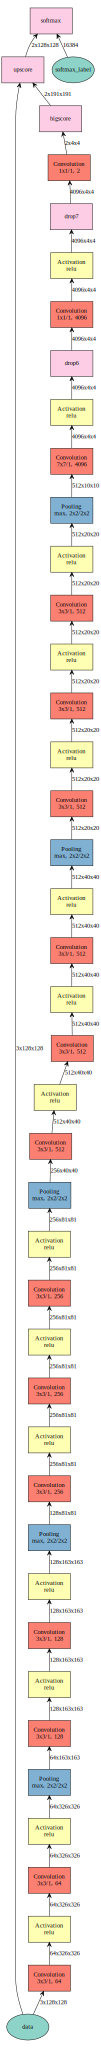

In [9]:
mx.viz.plot_network(fcnxs,shape={'data':(1,3,128,128)})

In [ ]:
infer_shape

In [373]:
out.infer_shape(m=m.shape)

([(1L, 1L, 4L, 4L), (1L, 16L)], [(1L, 1L, 4L, 4L)], [])

##### FCN-atrous

In [12]:
from symbol_fcnxs_atrous_person import get_fcnatrous_symbol
import mxnet as mx


In [13]:
fcnatrous = get_fcnatrous_symbol(
            numclass=2
        )

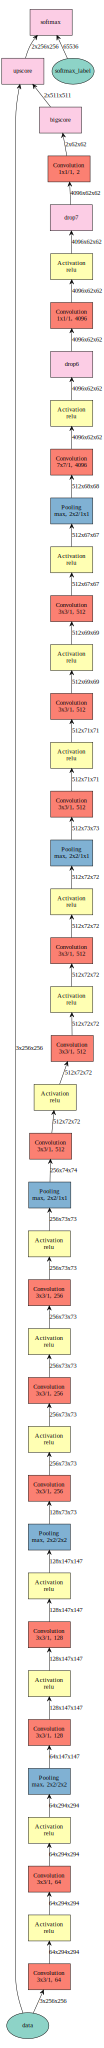

In [14]:
mx.viz.plot_network(fcnatrous,shape={'data':(8,3,256,256)})

In [4]:
fcnatrous.infer_shape(data=(8,3,256,256))

([(8L, 3L, 256L, 256L),
  (64L, 3L, 3L, 3L),
  (64L,),
  (64L, 64L, 3L, 3L),
  (64L,),
  (128L, 64L, 3L, 3L),
  (128L,),
  (128L, 128L, 3L, 3L),
  (128L,),
  (256L, 128L, 3L, 3L),
  (256L,),
  (256L, 256L, 3L, 3L),
  (256L,),
  (256L, 256L, 3L, 3L),
  (256L,),
  (512L, 256L, 3L, 3L),
  (512L,),
  (512L, 512L, 3L, 3L),
  (512L,),
  (512L, 512L, 3L, 3L),
  (512L,),
  (512L, 512L, 3L, 3L),
  (512L,),
  (512L, 512L, 3L, 3L),
  (512L,),
  (512L, 512L, 3L, 3L),
  (512L,),
  (4096L, 512L, 7L, 7L),
  (4096L,),
  (4096L, 4096L, 1L, 1L),
  (4096L,),
  (2L, 4096L, 1L, 1L),
  (2L,),
  (42L, 2L, 3L, 3L),
  (42L,),
  (42L, 42L, 3L, 3L),
  (42L,),
  (84L, 42L, 3L, 3L),
  (84L,),
  (168L, 84L, 3L, 3L),
  (168L,),
  (336L, 168L, 3L, 3L),
  (336L,),
  (672L, 336L, 3L, 3L),
  (672L,),
  (672L, 672L, 3L, 3L),
  (672L,),
  (2L, 672L, 1L, 1L),
  (2L,),
  (2L, 2L, 16L, 16L)],
 [(8L, 2L, 351L, 351L)],
 [])

##### 测试Module模块

In [2]:
from symbol_fcnxs_person import get_fcn32s_symbol, offset
import mxnet as mx
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
fcn32s = get_fcn32s_symbol(
            numclass=2
        )

In [4]:
mod = mx.mod.Module(fcn32s,context=mx.context.gpu(0))

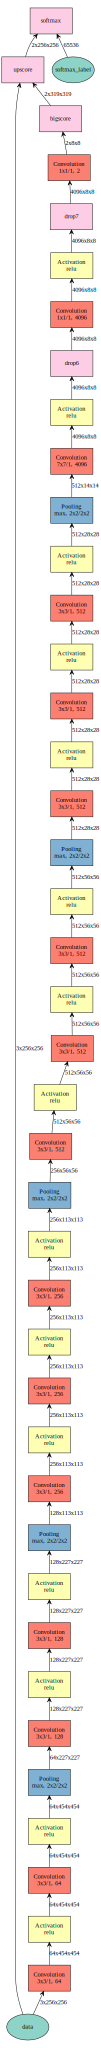

In [103]:
mx.viz.plot_network(fcn32s,shape={'data':(8,3,256,256)})

In [5]:
mod.bind(data_shapes=dataiter1.provide_data,
         label_shapes=dataiter1.provide_label)

In [6]:
mod.init_params()

In [10]:
mod.get_params()

({'bigscore_weight': 
  [[[[ 0.00380559  0.00481423 -0.00712601 ...,  0.00665858 -0.00275956
      -0.00152148]
     [-0.00449658 -0.00428557 -0.00797178 ...,  0.00928143 -0.00253929
       0.00836254]
     [-0.0026719   0.0001527   0.00854678 ..., -0.00334575  0.00700446
       0.00862561]
     ..., 
     [ 0.00929065  0.00736354 -0.00322198 ..., -0.00707382  0.00371701
       0.00936616]
     [ 0.00038158 -0.0083454  -0.00172062 ...,  0.00599831  0.00786643
       0.0096947 ]
     [ 0.00478792  0.00779222  0.00857067 ...,  0.00241708 -0.00123054
       0.00963328]]
  
    [[-0.00587544  0.00892541 -0.00457878 ...,  0.00881421  0.00098156
      -0.00041105]
     [-0.00292999 -0.00598669  0.00288406 ..., -0.00776813 -0.00789385
       0.00501577]
     [ 0.00635856  0.00893716 -0.00750564 ..., -0.00177957 -0.00853484
       0.00825659]
     ..., 
     [-0.00707807  0.00712721  0.00153388 ...,  0.00414065 -0.00023653
       0.00414424]
     [ 0.00620756 -0.00472945  0.00254542 ...,  0.00

In [4]:
batch_end_callback = mx.callback.Speedometer(batch_size=8,frequent=1)

In [7]:
mod.fit(dataiter1, 
        num_epoch=1,
        batch_end_callback = mx.callback.Speedometer(batch_size=dataiter1.batch_size,
                                                     frequent=1),
       ) 

/home/wangjundong/incubator-mxnet/python/mxnet/module/base_module.py:464: UserWarning: Parameters already initialized and force_init=False. init_params call ignored.
  allow_missing=allow_missing, force_init=force_init)


### 可视化结果_COCO

#### 恢复网络参数

In [1]:
import mxnet as mx
ctx = mx.gpu(1)
resize_size = (256,256)
batch_size = 10
prefix = "model_coco_person/FCN32s_VGG16_size%d_batch%d_lr1e-06" % (resize_size[0], 8)
epoch = 50
print prefix,epoch
fcn32s,fcn32s_args,fcn32s_auxs = mx.model.load_checkpoint(
    prefix, 
    epoch,
)
for k, v in fcn32s_args.items():
    fcn32s_args[k] = v.copyto(ctx)
fcn32s_args["data"] = mx.nd.empty((batch_size,3,resize_size[0],resize_size[1]), ctx)
data_shape = fcn32s_args["data"].shape
label_shape = (batch_size, data_shape[2] * data_shape[3])
fcn32s_args["softmax_label"] = mx.nd.empty(label_shape, ctx)
    
# FCN 8
# model_previx = "model_pascal/FCN8s_VGG16"
# epoch = 19
# fcn8s, fcn8s_args, fcn8s_auxs = mx.model.load_checkpoint(model_previx, epoch)
# for k, v in fcn8s_args.items():
#     fcn8s_args[k] = v.copyto(ctx)
# fcn8s_args["data"] = mx.nd.empty((batch_size,3,resize_size[0],resize_size[1]), ctx)
# data_shape = fcn8s_args["data"].shape
# label_shape = (batch_size, data_shape[2] * data_shape[3])
# fcn8s_args["softmax_label"] = mx.nd.empty(label_shape, ctx)

model_coco_person/FCN32s_VGG16_size256_batch8_lr1e-06 50


#### 显示网络

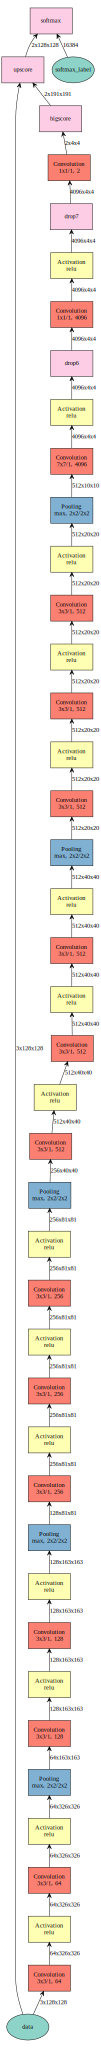

In [2]:
mx.viz.plot_network(
    fcn32s_args,
    shape={'data':(batch_size,3,resize_size[0],resize_size[1])})

#### 绑定参数

In [4]:
fcn32s_exector = fcn32s.bind(
    ctx,
    fcn32s_args, 
    args_grad=None, 
    grad_req="null",
    aux_states=fcn32s_auxs
)
# fcn8s_exector = fcn8s.bind(
#     ctx,
#     fcn8s_args, 
#     args_grad=None, 
#     grad_req="null",
#     aux_states=fcn8s_auxs
# )

#### 打开图片

In [1]:
%matplotlib inline
from PIL import Image
from skimage import io,transform
import numpy as np
import pandas as pd
import cv2
import mxnet as mx
import matplotlib.pyplot as plt
# batch_size = 10
# size = resize_size
size = (256,256)
batch_size = 2
rgb_mean = (123.68, 116.779, 103.939)
# path_imgrec="./coco_person_datasets/coco_val_%d,%d.rec"%(size[0],size[1])
# path_imgrec="./pascal_voc_person_datasets/pascal_val_%d,%d.rec" % (size[0], size[1])
path_imgrec="/home/wangjundong/data/segmentation_data/lip_person_datasets/lip_train_%d,%d.rec" % (size[0], size[1])
# path_imglist="./potrait_person_datasets/portrait_val.lst" 
# path_imgrec="/home/wangjundong/mxnet/tools/pp_val.rec" 
# path_imglist="/home/wangjundong/mxnet/tools/pp_val.lst"
dataiter1 = mx.io.ImageRecordIter_v1(
    #rec文件的路径
#     path_imglist=path_imglist,
    path_imgrec=path_imgrec,
    #iterator生成的每一个实例的shape
    data_shape=(3, size[0], size[1]),
    mean_r=rgb_mean[0],
    mean_g=rgb_mean[1],
    mean_b=rgb_mean[2],
    data_name='data',
    label_name='softmax_label',
    #batch的大小
    batch_size=batch_size,
    #是否随机从原图中切取出一个data_shape大小
    rand_crop=False,
    #是否随机水平反射
    rand_mirror=False,
    label_width= size[0]*size[1]
)
dataiter2 = mx.io.ImageRecordIter_v1(
    #rec文件的路径
    path_imgrec=path_imgrec,
    #iterator生成的每一个实例的shape
    data_shape=(3, size[0], size[1]),
#     mean_r=rgb_mean[0],
#     mean_g=rgb_mean[1],
#     mean_b=rgb_mean[2],
    data_name='data',
    label_name='softmax_label',
    #batch的大小
    batch_size=batch_size,
    #是否随机从原图中切取出一个data_shape大小
    rand_crop=False,
    #是否随机水平反射
    
    rand_mirror=False,
    label_width=size[0]*size[1]
)

In [51]:
data1 = dataiter1.next()
data2 = dataiter2.next()

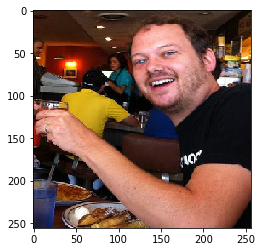

In [52]:
plt.imshow(data2.data[0].asnumpy()[4].astype(np.uint8).transpose(1,2,0))

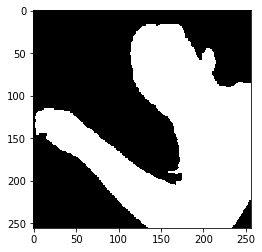

In [46]:
plt.imshow(data1.label[0].asnumpy()[4].reshape(size),cmap='gray')

In [8]:
# FCN 32
fcn32s_args["data"][:] = mx.nd.array(data1.data[0], ctx)
data_shape = fcn32s_args["data"].shape
print data_shape

# FCN 8
# fcn8s_args["data"][:] = mx.nd.array(data1.data[0], ctx)

(10L, 3L, 256L, 256L)


#### 网络预测

In [9]:
%time fcn32s_output = fcn32s_exector.forward(is_train=False)[0]
print fcn32s_output.shape
# 计算结果
segs = fcn32s_output.asnumpy()
fcn32s_segs_01 = segs[:,1,:,:]>0.8
fcn32s_segs_02 = segs[:,1,:,:]>0.5
fcn32s_segs_03 = segs[:,1,:,:]>0.1
print fcn32s_segs_01.shape

# %time fcn8s_output = fcn8s_exector.forward(is_train=False)[0]
# fcn8s_segs_01 = fcn8s_output.asnumpy()[:,15]>0.5
# print fcn8s_segs_01.shape

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 426 µs
(10L, 2L, 256L, 256L)
(10, 256, 256)


In [51]:
result = {}
for k in fcn8s_output.asnumpy().argmax(axis=1)[9].flatten():
    result[k] = result.get(k,0)+1
print result

{0: 25334, 1: 7, 4: 3, 5: 277, 9: 33, 11: 3634, 12: 66, 15: 35833, 18: 41, 19: 308}


#### 结果显示

##### 随机生成颜色

In [13]:
rgb = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]
print rgb
for i in range(3):
    rgb[i] = int(rgb[i] * 255)
rgb = tuple(rgb)
print rgb
mask = Image.new("RGB", color=rgb, size=size)
mask = mask.convert("RGBA")
mask_array = np.array(mask)
print mask_array.shape

[0.968167683095566, 0.5886866663251435, 0.516204857144092]
(246, 150, 131)
(256, 256, 4)


##### 展示

In [12]:
def get_mask(index,segs):
    for i in range(segs[index].shape[0]):
        for j in range(segs[index].shape[1]):
            if segs[index][i, j] == 1:
                mask_array[i, j, 3] = 200
            else:
                mask_array[i, j, 3] = 0
    mask = Image.fromarray(mask_array)
    return mask

truth
threshold> 0.8
threshold> 0.5
threshold> 0.1


(-0.5, 255.5, 255.5, -0.5)

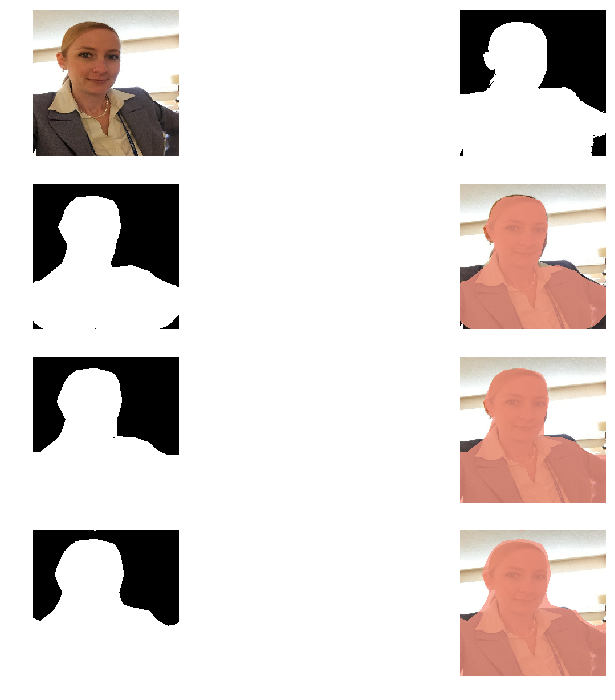

In [23]:
# 50次迭代
plt.figure(figsize=(12,12)) 
index = 6
# 图片
img_arr = data2.data[0][index].asnumpy().astype(np.uint8).transpose(1,2,0)
plt.subplot(5,2,1)
io.imshow(img_arr);plt.axis('off')
# 真实
print 'truth'
label = data2.label[0][index].asnumpy().astype(np.uint8)
label = label.reshape(size)
plt.subplot(5,2,2)
plt.imshow(label,cmap='gray');plt.axis('off')
# 预测
print 'threshold>',0.8
plt.subplot(5,2,3)
plt.imshow(fcn32s_segs_01[index],cmap='gray');plt.axis('off')
# 一起显示
mask = get_mask(index,fcn32s_segs_01)
img = Image.fromarray(img_arr)
img.paste(box=[0, 0], im=mask, mask=mask)
plt.subplot(5,2,4)
plt.imshow(img)
plt.axis('off')

# 预测
print 'threshold>',0.5
plt.subplot(5,2,5)
plt.imshow(fcn32s_segs_02[index],cmap='gray');plt.axis('off')
# 一起显示
mask = get_mask(index,fcn32s_segs_02)
img = Image.fromarray(img_arr)
img.paste(box=[0, 0], im=mask, mask=mask)
plt.subplot(5,2,6)
plt.imshow(img)
plt.axis('off')

# 预测
print 'threshold>',0.1
plt.subplot(5,2,7)
plt.imshow(fcn32s_segs_03[index],cmap='gray');plt.axis('off')
# 一起显示
mask = get_mask(index,fcn32s_segs_03)
img = Image.fromarray(img_arr)
img.paste(box=[0, 0], im=mask, mask=mask)
plt.subplot(5,2,8)
plt.imshow(img)
plt.axis('off')

# # 预测 - FCN 8
# plt.subplot(4,2,7)
# plt.imshow(fcn8s_segs_01[index],cmap='gray');plt.axis('off')
# # 一起显示
# mask = get_mask(index,fcn8s_segs_01)
# img = Image.fromarray(img_arr)
# img.paste(box=[0, 0], im=mask, mask=mask)
# plt.subplot(4,2,8)
# plt.imshow(img)
# plt.axis('off')

### 可视化结果_PASCAL

#### 恢复网络参数

In [78]:
import mxnet as mx
ctx = mx.gpu(1)
resize_size = (256,256)
batch_size = 10
prefix = "model_pascal/FCN8s_VGG16"
epoch = 19
fcnxs,fcnxs_args,fcnxs_auxs = mx.model.load_checkpoint(
    prefix, 
    epoch,
)
for k, v in fcnxs_args.items():
    fcnxs_args[k] = v.copyto(ctx)
fcnxs_args["data"] = mx.nd.empty((batch_size,
                                  3,
                                  resize_size[0],
                                  resize_size[1]), ctx)
data_shape = fcnxs_args["data"].shape
label_shape = (batch_size, data_shape[2] * data_shape[3])
fcnxs_args["softmax_label"] = mx.nd.empty(label_shape, ctx)
    
# # FCN 8
# model_previx = "model_pascal/FCN8s_VGG16"
# epoch = 19
# fcn8s, fcn8s_args, fcn8s_auxs = mx.model.load_checkpoint(model_previx, epoch)
# for k, v in fcn8s_args.items():
#     fcn8s_args[k] = v.copyto(ctx)
# fcn8s_args["data"] = mx.nd.empty((batch_size,3,resize_size[0],resize_size[1]), ctx)
# data_shape = fcn8s_args["data"].shape
# label_shape = (batch_size, data_shape[2] * data_shape[3])
# fcn8s_args["softmax_label"] = mx.nd.empty(label_shape, ctx)

#### 显示网络

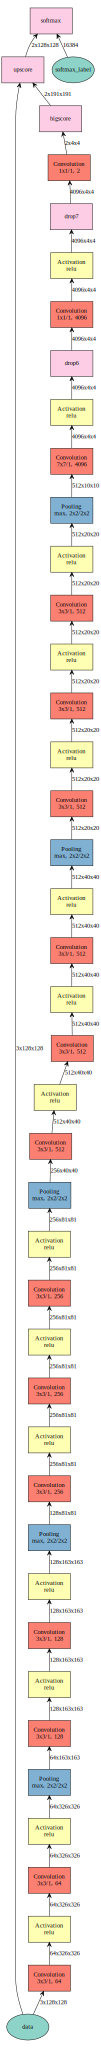

In [2]:
mx.viz.plot_network(
    fcnxs,
    shape={'data':(batch_size,3,resize_size[0],resize_size[1])})

#### 绑定参数

In [81]:
fcnxs_exector = fcnxs.bind(
    ctx,
    fcnxs_args, 
    args_grad=None, 
    grad_req="null",
    aux_states=fcnxs_auxs
)
# fcn8s_exector = fcn8s.bind(
#     ctx,
#     fcn8s_args, 
#     args_grad=None, 
#     grad_req="null",
#     aux_states=fcn8s_auxs
# )

#### 打开图片

In [83]:
%matplotlib inline
from PIL import Image
from skimage import io,transform
import numpy as np
import pandas as pd
import cv2
import mxnet as mx
import matplotlib.pyplot as plt

size = resize_size
rgb_mean = (123.68, 116.779, 103.939)
path_imgrec="./pascal_voc_person_datasets/pascal_val_%d,%d.rec" % (resize_size[0], resize_size[1])
dataiter1 = mx.io.ImageRecordIter(
    #rec文件的路径
    path_imgrec=path_imgrec,
    #iterator生成的每一个实例的shape
    data_shape=(3, size[0], size[1]),
    mean_r=rgb_mean[0],
    mean_g=rgb_mean[1],
    mean_b=rgb_mean[2],
    data_name='data',
    label_name='softmax_label',
    #batch的大小
    batch_size=batch_size,
    #是否随机从原图中切取出一个data_shape大小
    rand_crop=False,
    #是否随机水平反射
    rand_mirror=False,
    label_width=size[0]*size[1]
)
dataiter2 = mx.io.ImageRecordIter(
    #rec文件的路径
    path_imgrec=path_imgrec,
    #iterator生成的每一个实例的shape
    data_shape=(3, size[0], size[1]),
#     mean_r=rgb_mean[0],
#     mean_g=rgb_mean[1],
#     mean_b=rgb_mean[2],
    data_name='data',
    label_name='softmax_label',
    #batch的大小
    batch_size=batch_size,
    #是否随机从原图中切取出一个data_shape大小
    rand_crop=False,
    #是否随机水平反射
    rand_mirror=False,
    label_width=size[0]*size[1]
)

In [84]:
data1 = dataiter1.next()
data2 = dataiter2.next()

In [85]:
# FCN 32
fcnxs_args["data"][:] = mx.nd.array(data1.data[0], ctx)
data_shape = fcnxs_args["data"].shape
print data_shape

# FCN 8
# fcn8s_args["data"][:] = mx.nd.array(data1.data[0], ctx)

(10L, 3L, 256L, 256L)


#### 网络预测

In [97]:
%time fcnxs_output = fcnxs_exector.forward(is_train=False)[0]
print fcnxs_output.shape
# 计算结果
segs = fcnxs_output.asnumpy()
fcnxs_segs_01 = segs[:,15,:,:]>0.8
fcnxs_segs_02 = segs[:,15,:,:]>0.5
fcnxs_segs_02 = segs[:,15,:,:]>0.1
print fcnxs_segs_01.shape

# %time fcn8s_output = fcn8s_exector.forward(is_train=False)[0]
# fcn8s_segs_01 = fcn8s_output.asnumpy()[:,15]>0.5
# print fcn8s_segs_01.shape

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 198 µs
(10L, 21L, 256L, 256L)
(10, 256, 256)


In [93]:
result = {}
for k in segs.argmax(axis=1)[0].flatten():
    result[k] = result.get(k,0)+1
print result

{0: 30240, 9: 29, 15: 35267}


#### 结果显示

##### 随机生成颜色

In [87]:
rgb = (np.random.random((1, 3)) * 0.6 + 0.4).tolist()[0]
print rgb
for i in range(3):
    rgb[i] = int(rgb[i] * 255)
rgb = tuple(rgb)
print rgb

[0.5804830269663945, 0.6482353844879403, 0.714183196829818]
(148, 165, 182)


In [88]:
mask = Image.new("RGB", color=rgb, size=size)
mask = mask.convert("RGBA")
mask_array = np.array(mask)
print mask_array.shape

(256, 256, 4)


##### 展示

In [89]:
def get_mask(index,segs):
    for i in range(segs[index].shape[0]):
        for j in range(segs[index].shape[1]):
            if segs[index][i, j] == 1:
                mask_array[i, j, 3] = 200
            else:
                mask_array[i, j, 3] = 0
    mask = Image.fromarray(mask_array)
    return mask

(-0.5, 255.5, 255.5, -0.5)

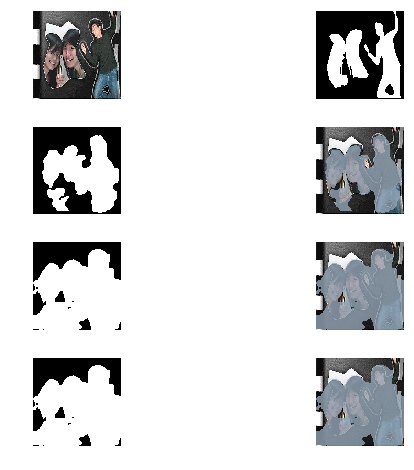

In [99]:
# 50次迭代
plt.figure(figsize=(8,8)) 
index = 0
# 图片
img_arr = data2.data[0][index].asnumpy().astype(np.uint8).transpose(1,2,0)
plt.subplot(5,2,1)
io.imshow(img_arr);plt.axis('off')
# 真实
label = data2.label[0][index].asnumpy().astype(np.uint8)
label = label.reshape(size)
plt.subplot(5,2,2)
plt.imshow(label,cmap='gray');plt.axis('off')
# 预测
plt.subplot(5,2,3)
plt.imshow(fcnxs_segs_01[index],cmap='gray');plt.axis('off')
# 一起显示
mask = get_mask(index,fcnxs_segs_01)
img = Image.fromarray(img_arr)
img.paste(box=[0, 0], im=mask, mask=mask)
plt.subplot(5,2,4)
plt.imshow(img)
plt.axis('off')

# 预测
plt.subplot(5,2,5)
plt.imshow(fcnxs_segs_02[index],cmap='gray');plt.axis('off')
# 一起显示
mask = get_mask(index,fcnxs_segs_02)
img = Image.fromarray(img_arr)
img.paste(box=[0, 0], im=mask, mask=mask)
plt.subplot(5,2,6)
plt.imshow(img)
plt.axis('off')

# 预测
plt.subplot(5,2,7)
plt.imshow(fcnxs_segs_02[index],cmap='gray');plt.axis('off')
# 一起显示
mask = get_mask(index,fcnxs_segs_02)
img = Image.fromarray(img_arr)
img.paste(box=[0, 0], im=mask, mask=mask)
plt.subplot(5,2,8)
plt.imshow(img)
plt.axis('off')

# 预测 - FCN 8
# plt.subplot(4,2,7)
# plt.imshow(fcn8s_segs_01[index],cmap='gray');plt.axis('off')
# # 一起显示
# mask = get_mask(index,fcn8s_segs_01)
# img = Image.fromarray(img_arr)
# img.paste(box=[0, 0], im=mask, mask=mask)
# plt.subplot(4,2,8)
# plt.imshow(img)
# plt.axis('off')